### Feature Scaling

With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.  

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means. 

In this notebook, you will get to see this first hand.  To begin, let's read in the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
import helpers2 as h
import tests as t


# Create the dataset for the notebook
data = h.simulate_data(200, 2, 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']
df['height'] = np.abs(df['height']*100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

`1.` Next, take a look at the data to get familiar with it.  The dataset has two columns, and it is stored in the **df** variable.  It might be useful to get an idea of the spread in the current data, as well as a visual of the points.  

In [2]:
#Take a look at the data
from IPython.display import display
display(df.head())
display(df.describe())

,height,weight
0,650.565335,36.008958
1,512.894273,37.721375
2,885.057453,49.073225
3,1028.641210,60.878718
4,746.899195,48.586816


,height,weight
count,200.000000,200.000000
mean,569.726207,53.238437
std,246.966215,12.333058
min,92.998481,28.157647
25%,357.542793,44.541471
50%,545.766752,52.612448
75%,773.310607,62.111858
max,1096.222348,83.228498


In [7]:
#use this cell if you would like as well
ndf = df.copy()
ndf = ((ndf - ndf.mean())/ndf.std())
ndf.describe()

,height,weight
count,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16
std,1.000000e+00,1.000000e+00
min,-1.930336e+00,-2.033623e+00
25%,-8.591597e-01,-7.051751e-01
50%,-9.701511e-02,-5.075696e-02
75%,8.243411e-01,7.194827e-01
max,2.131855e+00,2.431681e+00


Now that we've got a dataset, let's look at some options for scaling the data.  As well as how the data might be scaled.  There are two very common types of feature scaling that we should discuss:


**I.  MinMaxScaler**

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value.  In these cases, you will want to use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to get practice with feature scaling methods in python, we will perform both.

`2.` First let's fit the **StandardScaler** transformation to this dataset.  I will do this one so you can see how to apply preprocessing in sklearn.

In [11]:
scaled_data = p.StandardScaler().fit_transform(df) # Fit and transform the data

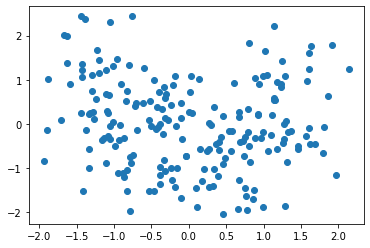

In [14]:
df_ss = pd.DataFrame(scaled_data, columns=df.columns) #create a dataframe
# df_ss.columns = ['height', 'weight'] #add column names again

plt.scatter(df_ss['height'], df_ss['weight']); # create a plot

`3.` Now it's your turn.  Try fitting the **MinMaxScaler** transformation to this dataset. You should be able to use the previous example to assist.

In [15]:
# fit and transform
scaled_data = p.MinMaxScaler().fit_transform(df)
df_mm = pd.DataFrame(scaled_data, columns=df.columns)

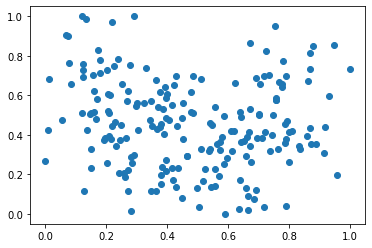

In [17]:
#create a dataframe
#change the column names
#plot the data
plt.scatter(df_mm['height'], df_mm['weight'])

`4.`  Now let's take a look at how kmeans divides the dataset into different groups for each of the different scalings of the data.  Did you end up with different clusters when the data was scaled differently?

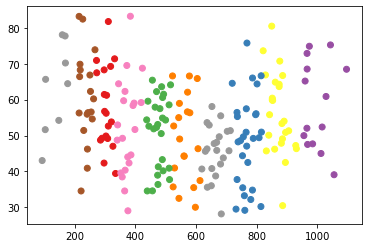

In [18]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10) #fit kmeans to get the labels
    
# Plot the original data with clusters
plt.scatter(df['height'], df['weight'], c=labels, cmap='Set1');

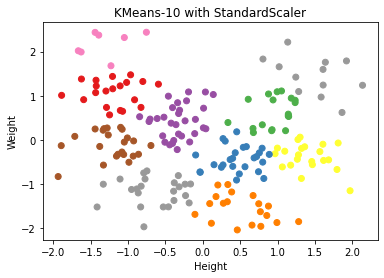

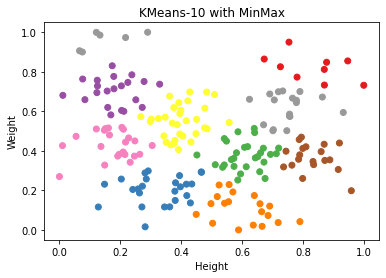

In [21]:
#plot each of the scaled datasets
for d, name in zip((df_ss, df_mm), ('StandardScaler', 'MinMax')):
    cntr = 10
    lbl = fit_kmeans(d, cntr)
    plt.scatter(d['height'], d['weight'], c=lbl, cmap='Set1')
    plt.title(f'KMeans-{cntr} with {name}')
    plt.xlabel('Height'); plt.ylabel('Weight')
    plt.show()

In [ ]:
#another plot of the other scaled dataset

Write your response here!

[ACM] Yes, but the MinMax scaler and StandardScaler produced similar clusters and differences were found in the outlier values